<a href="https://colab.research.google.com/github/pachterlab/GRNP_2020/blob/master/notebooks/figure_generation/GenFigS22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generates supplementary figure 22**

This notebook creates supplementary figure 22. The code runs experiments on simulated data. The details of what the code does can be found in supplementary note 2 of the paper.

Steps:
1. Download the code and precalculated data
2. Setup the R environment
4. Run the calculations and save the data to disk

The data for this figure is produced by the following notebooks:

Processing of FASTQ files with kallisto and bustools:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3_3.ipynb

Preprocessing of BUG files:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3_3.ipynb

Precalculate figure data: 

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/figure_generation/GenFigS22Data.ipynb




**1. Download the code and processed data**

In [1]:
#download the R code
![ -d "GRNP_2020" ] && rm -r GRNP_2020

!git clone https://github.com/pachterlab/GRNP_2020.git


Cloning into 'GRNP_2020'...
remote: Enumerating objects: 379, done.
remote: Counting objects: 100% (379/379), done.
remote: Compressing objects: 100% (319/319), done.
remote: Total 2097 (delta 280), reused 87 (delta 60), pack-reused 1718
Receiving objects: 100% (2097/2097), 11.19 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (1465/1465), done.


In [2]:
#download processed data from Zenodo
![ -d "figureData" ] && rm -r figureData
!mkdir figureData
!cd figureData && wget https://zenodo.org/record/4661263/files/FigureData.zip?download=1 && unzip 'FigureData.zip?download=1' && rm 'FigureData.zip?download=1'


--2021-04-05 14:40:45--  https://zenodo.org/record/4661263/files/FigureData.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7490400 (7.1M) [application/octet-stream]
Saving to: ‘FigureData.zip?download=1’

FigureData.zip?down 100%[===================>]   7.14M  7.66MB/s    in 0.9s    

2021-04-05 14:40:47 (7.66 MB/s) - ‘FigureData.zip?download=1’ saved [7490400/7490400]

Archive:  FigureData.zip?download=1
 extracting: Fig3C_r1.RDS            
 extracting: Fig3C_r2.RDS            
 extracting: Fig3_h1.RDS             
 extracting: Fig3_h2.RDS             
  inflating: Fig4AC_ldata.RDS        
  inflating: Fig4AC_ldata2.RDS       
  inflating: Fig4_DE.RDS             
  inflating: gc.RDS                  
  inflating: simDepthData.RDS        
  inflating: simFcData.RDS           
  inflating: simGexData.RDS          
 extracting: simMuData.RDS  

In [3]:
#Check that download worked
!cd figureData && ls -l

total 7940
-rw-r--r-- 1 root root     239 Jun 30  2020 Fig3C_r1.RDS
-rw-r--r-- 1 root root     233 Jun 30  2020 Fig3C_r2.RDS
-rw-r--r-- 1 root root     683 Jun 30  2020 Fig3_h1.RDS
-rw-r--r-- 1 root root     830 Jun 30  2020 Fig3_h2.RDS
-rw-r--r-- 1 root root  372141 Apr  3 16:59 Fig4AC_ldata2.RDS
-rw-r--r-- 1 root root  480126 Apr  3 16:59 Fig4AC_ldata.RDS
-rw-r--r-- 1 root root 3949960 Feb 25 18:38 Fig4_DE.RDS
-rw-r--r-- 1 root root  304548 Feb 26 13:30 gc.RDS
-rw-r--r-- 1 root root 1128027 Feb 15 11:34 simDepthData.RDS
-rw-r--r-- 1 root root  621646 Feb 15 13:22 simFcData.RDS
-rw-r--r-- 1 root root 1237109 Feb 15 15:46 simGexData.RDS
-rw-r--r-- 1 root root     284 Feb 15 01:28 simMuData.RDS


**2. Prepare the R environment**

In [4]:
#switch to R mode
%reload_ext rpy2.ipython


In [5]:
#install the R packages and setup paths
%%R
install.packages("dplyr")
install.packages("DescTools")
install.packages("ggplot2")
install.packages("ggpubr")
install.packages("pROC")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 949019 bytes (926 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

**3. Generate the figures**


In [6]:
#First set some path variables
%%R
source("GRNP_2020/RCode/pathsGoogleColab.R")


In [7]:
#Import helpers (available in other notebooks)
%%R
source(paste0(sourcePath,"ButterflyHelpers.R"))





R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
#create figure directory
![ -d "figures" ] && rm -r figures
!mkdir figures

In [9]:
%%R
###########################################
#Load the data
###########################################
library(ggplot2)
library(ggpubr)
library(pROC)

depthData = readRDS(file=paste0(figure_data_path, "simDepthData.RDS"))
muData = readRDS(file =paste0(figure_data_path, "simMuData.RDS"))
fcData = readRDS(file =paste0(figure_data_path, "simFcData.RDS"))
gexData = readRDS(file =paste0(figure_data_path, "simGexData.RDS"))

numGenes = 500
logDepths = (-5):5
logMus = seq(-7,3,by=1)
lfcs = seq(0.5,3,by=0.5)
logGexs = 2:13



R[write to console]: Type 'citation("pROC")' for a citation.

R[write to console]: 
Attaching package: ‘pROC’


R[write to console]: The following objects are masked from ‘package:stats’:

    cov, smooth, var




R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases



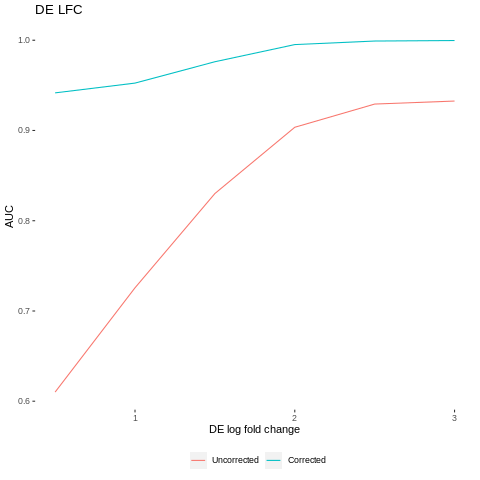

In [10]:
%%R
####################
# FC
####################

ns = length(fcData$de)

x=lfcs[1:ns]
y1=rep(NA,ns)
y2=rep(NA,ns)

for (i in 1:ns) {
  rocInfoUnc = roc(fcData$de[[i]], abs(fcData$fcUnc[[i]]), plot=FALSE )
  rocInfoCorr = roc(fcData$de[[i]], abs(fcData$fcCorr[[i]]), plot=FALSE )
  y1[i] = rocInfoUnc$auc
  y2[i] = rocInfoCorr$auc
}

group = factor(c(rep(0,ns),rep(1,ns)), c(0,1), c("Uncorrected", "Corrected"))

dsPlot = data.frame(x=c(x,x), y=c(y1,y2), group=group)

pA = ggplot(dsPlot, aes(x=x, y=y, group=group, color=group)) + 
  geom_line() + #geom_point(size=1.5) +
  labs(y="AUC", x="DE log fold change") +
  ggtitle("DE LFC") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"), legend.position= "bottom", 
        legend.direction = "horizontal", legend.box = "horizontal", legend.title = element_blank()) +
  guides(fill=guide_legend(nrow=1, ncol=2, byrow=F))

print(pA)

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases



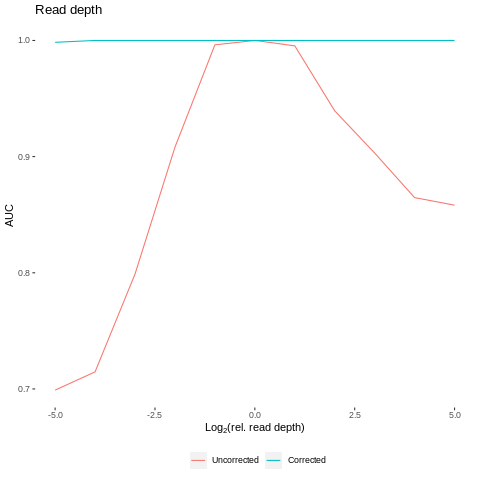

In [11]:
%%R
####################
# Depth
####################

ns = length(depthData$de)

x=logDepths
y1=rep(NA,ns)
y2=rep(NA,ns)

for (i in 1:ns) {
    rocInfoUnc = roc(depthData$de[[i]], abs(depthData$fcUnc[[i]]), plot=FALSE )
    rocInfoCorr = roc(depthData$de[[i]], abs(depthData$fcCorr[[i]]), plot=FALSE )
    y1[i] = rocInfoUnc$auc
    y2[i] = rocInfoCorr$auc
}

group = factor(c(rep(0,ns),rep(1,ns)), c(0,1), c("Uncorrected", "Corrected"))

dsPlot = data.frame(x=c(x,x), y=c(y1,y2), group=group)

pB = ggplot(dsPlot, aes(x=x, y=y, group=group, color=group)) + 
  geom_line() + #geom_point(size=1.5) +
  labs(y="AUC", x=expression(Log[2]*"(rel. read depth)")) +
  ggtitle("Read depth") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"), legend.position= "bottom", 
        legend.direction = "horizontal", legend.box = "horizontal", legend.title = element_blank()) +
  guides(fill=guide_legend(nrow=1, ncol=2, byrow=F))

print(pB)

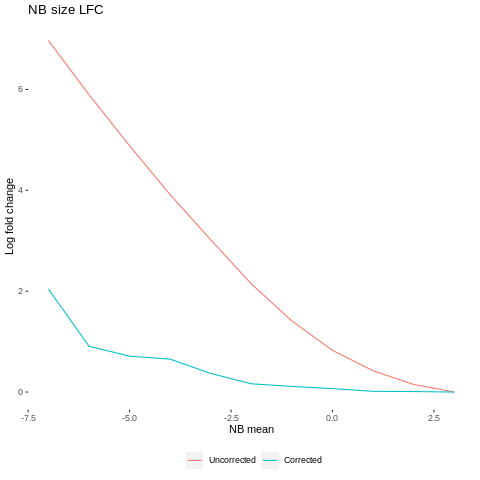

In [12]:
%%R
####################
# Mu
####################

x=logMus

y1=muData$muFCUnc
y2=muData$muFCCorr

group = factor(c(rep(0,ns),rep(1,ns)), c(0,1), c("Uncorrected", "Corrected"))

dsPlot = data.frame(x=c(x,x), y=c(y1,y2), group=group)

pC = ggplot(dsPlot, aes(x=x, y=y, group=group, color=group)) + 
  geom_line() + #geom_point(size=1.5) +
  labs(y="Log fold change", x="NB mean") +
  ggtitle("NB size LFC") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"), legend.position= "bottom", 
        legend.direction = "horizontal", legend.box = "horizontal", legend.title = element_blank()) +
  guides(fill=guide_legend(nrow=1, ncol=2, byrow=F))

print(pC)

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = FALSE, case = TRUE

R[write to console]: Setting direction: controls < cases



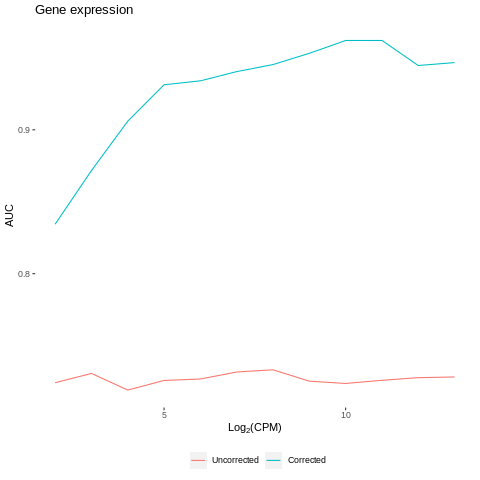

In [13]:
%%R
####################
# Gene expr
####################

ns = length(gexData$de)

x=logGexs
y1=rep(NA,ns)
y2=rep(NA,ns)

for (i in 1:ns) {
  rocInfoUnc = roc(gexData$de[[i]], abs(gexData$fcUnc[[i]]), plot=FALSE )
  rocInfoCorr = roc(gexData$de[[i]], abs(gexData$fcCorr[[i]]), plot=FALSE )
  y1[i] = rocInfoUnc$auc
  y2[i] = rocInfoCorr$auc
}

group = factor(c(rep(0,ns),rep(1,ns)), c(0,1), c("Uncorrected", "Corrected"))

dsPlot = data.frame(x=c(x,x), y=c(y1,y2), group=group)

pD = ggplot(dsPlot, aes(x=x, y=y, group=group, color=group)) + 
  geom_line() + #geom_point(size=1.5) +
  labs(y="AUC", x=expression(Log[2]*"(CPM)")) +
  ggtitle("Gene expression") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"), legend.position= "bottom", 
        legend.direction = "horizontal", legend.box = "horizontal", legend.title = element_blank()) +
  guides(fill=guide_legend(nrow=1, ncol=2, byrow=F))

print(pD)

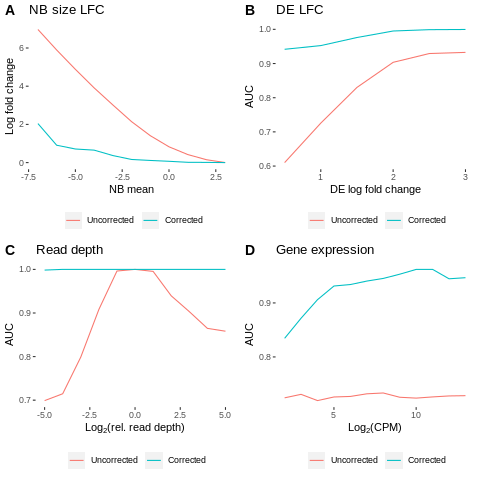

In [14]:
###########################
# Assemble all plots
###########################
%%R
figSim = ggarrange(pC, pA, pB, pD, nrow=2, ncol=2, labels=c("A","B","C","D"))
print(figSim)

ggsave(
  paste0(figure_path, "FigS22.png"),
  plot = figSim, device = "png",
  width = 6, height = 6, dpi = 300)
